## 一、导入及整合马尔黛佳所有数据

In [70]:
import pandas as pd
path1=open(r'C:\Users\86135\Desktop\新建文件夹\crm_vip_info.csv')
path2=open(r'C:\Users\86135\Desktop\新建文件夹\crm_coupon_list.csv')
data1=pd.read_csv(path1)
data2=pd.read_csv(path2)

del data1['分区']
del data2['分区']
del data1['oldbindnewid']
del data1['rowtype']
del data1['referee']
del data1['country']
del data1['copid']
data1=data1[data1['brandid']==65]   #筛选非该品牌数据
del data1['brandid']

del data2['rowtype']
del data2['couponprice']
del data2['brandid']
del data2['copid']

data1.columns=['会员编号','会员等级','老卡绑定时间','微信注册时间','服务渠道','服务导购','servicebindtime','入会时间','入会渠道','入会来源','邀请时间','邀请门店','邀请导购','最后更新时间','lastbuydate','mobileno','手机绑定时间','性别','生日','微信号码','wxunionid','省','城市','区','卡号']
del data1['微信号码']
del data1['wxunionid']

data2.columns=['id','所属券库','券包编号','券类型','券面额','有效期类型','有效起始日期','有效结束日期','有效结束日期Int','生成券日期','发放券用户','发放券渠道','活动来源','活动编号','会员编号','会员领取日期','服务渠道','券状态','核销渠道','核销时间','核销单编号','核销单号','订单金额','来源系统','最后更新时间']

d:\安装程序\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
d:\安装程序\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [71]:
data=pd.merge(data1, data2, how='inner', on=['会员编号'])
del data['核销渠道']
#del data['核销时间']
del data['核销单编号']
del data['核销单号']
#del data['订单金额']
del data['来源系统']
del data['最后更新时间_y']
data['会员编号']=data['会员编号'].astype(int)
data['会员等级'] = data['会员等级'].map({0.0:0, 1197.0:1,1198.0:2,1199.0:3})
data['券类型']=data['券类型'].map({'CX':1,'DJ':2,'LP':3,'YQ':4,'ZK':5})
#data=data.replace('0001-01-01 00:00:00.0','1970-01-01 08:00:00.0')

In [72]:
data=data[['会员编号','会员等级','服务渠道_x','服务导购','手机绑定时间','微信注册时间','入会时间','性别','生日','省','券类型','券面额','生成券日期','有效结束日期','核销时间','订单金额','活动编号','券状态']]
data['服务导购']=data['服务导购'].astype(int)
data['性别']=data['性别'].astype(int)
data['会员编号']=data['会员编号'].astype(int)
data['省'].fillna(0, inplace=True)
data['省']=data['省'].astype(int)
data['生日'].fillna('2019-01-01', inplace=True)#填充NAN数据
#data['省'].fillna(data['省'].median(), inplace=True)#中位数填充

import datetime as dt
data['生日']=pd.to_datetime(data['生日'])
data['年龄']=dt.datetime.today().year-data['生日'].dt.year
data['年龄']=data['年龄'].replace(0,data['年龄'].mean())
data['核销时间']=pd.to_datetime(data['核销时间'])
data['核销年']=data['核销时间'].dt.year
data['核销月']=data['核销时间'].dt.month
data['核销日']=data['核销时间'].dt.day

data['生日-月']=data['生日'].dt.month
data['生日-日']=data['生日'].dt.day

data=data[['会员编号','会员等级','服务渠道_x','服务导购','性别','生日-月','生日-日','省','券类型','券面额','核销年','核销月','核销日','订单金额','活动编号','券状态']]
data

,会员编号,会员等级,服务渠道_x,服务导购,性别,生日-月,生日-日,省,券类型,券面额,核销年,核销月,核销日,订单金额,活动编号,券状态
0,15102524,0,22824,0,0,1,1,0,3,0.0,2017,1,21,0.0,170,0
1,15066874,0,22824,0,0,1,1,0,3,0.0,2017,1,21,0.0,170,0
2,15066004,0,22824,0,0,1,1,0,3,0.0,2017,1,22,0.0,170,0
3,15065449,0,22976,0,0,1,1,0,3,0.0,2017,1,21,0.0,170,0
4,15056454,0,22976,0,0,1,1,0,3,0.0,2017,1,21,0.0,170,0
5,15049399,0,22824,0,0,1,1,0,3,0.0,2017,1,21,0.0,170,0
6,15048509,0,22824,0,0,1,1,0,3,0.0,2017,1,21,0.0,170,0
7,14986984,0,22824,0,0,1,1,0,3,0.0,2017,1,20,0.0,170,0
8,14986544,0,22824,0,0,1,1,0,3,0.0,2017,1,20,0.0,170,0
9,14986054,0,22824,0,0,1,1,0,3,0.0,2017,1,20,0.0,170,0


In [ ]:
dict_pro={} #省的编码字段
path=open(r'C:\Users\86135\Desktop\省份.txt')
province=dict(pd.read_json(path)['Data'])
for i in province:
    dict_pro[int(province[i]['JoinCode'])]=province[i]['Name']
dict_pro

In [73]:
coupon_1=data[data['券类型']==1]  #该券无意义   都为未核销
coupon_2=data[data['券类型']==2]
coupon_3=data[data['券类型']==3]
coupon_4=data[data['券类型']==4]
coupon_5=data[data['券类型']==5]
print('促销券:面额种类有',str(set(coupon_1['券面额'])),'数据量有'+str(len(coupon_1['券面额'])))
print('代金券:面额种类有',str(set(coupon_2['券面额'])),'数据量有'+str(len(coupon_2['券面额'])))
print('礼品券:面额种类有',str(set(coupon_3['券面额'])),'数据量有'+str(len(coupon_3['券面额'])))
print('邀请券:面额种类有',str(set(coupon_4['券面额'])),'数据量有'+str(len(coupon_4['券面额'])))
print('折扣券:面额种类有',str(set(coupon_5['券面额'])),'数据量有'+str(len(coupon_5['券面额'])))

促销券:面额种类有 {0.0} 数据量有437
代金券:面额种类有 {100.0, 260.0, 70.0, 40.0, 10.0, 13.0, 14.0, 15.0, 50.0, 20.0, 120.0, 60.0, 30.0} 数据量有177238
礼品券:面额种类有 {0.0, 50.0, 60.0} 数据量有153918
邀请券:面额种类有 {0.0, 0.8} 数据量有27031
折扣券:面额种类有 {0.8, 0.6} 数据量有3


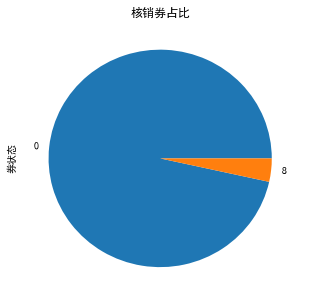

In [84]:
from pylab import mpl
mpl.rcParams["font.sans-serif"] = ["SimHei"]
data['券状态'].value_counts().plot(kind="pie",figsize=[5,5],title="核销券占比")

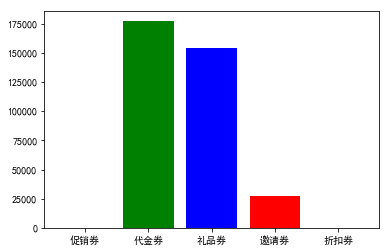

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
name_list = ['促销券','代金券','礼品券','邀请券','折扣券']
num_list = [len(coupon_1['券面额']),len(coupon_2['券面额']),len(coupon_3['券面额']),len(coupon_4['券面额']),len(coupon_5['券面额'])]
plt.bar(range(len(num_list)), num_list,color='rgb',tick_label=name_list)
plt.show()

### 直至10月发券量有35万
### 该品牌拥有五种券，其中促销券和折扣券数量非常少，暂忽略不计，主要使用的还是代金券和礼品券以及少部分的邀请券

# 二、券类分析

# 1.代金券

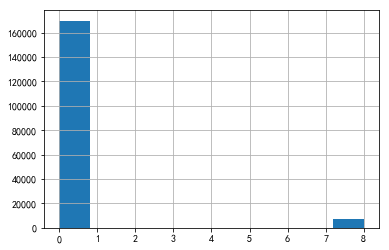

In [10]:
coupon_2['券状态'].hist()

### 代金券中未核销券和核销的券差距悬殊 总体比例大概在22:1左右

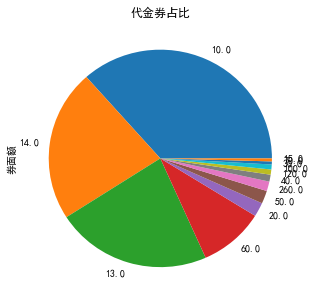

In [11]:
from pylab import mpl
mpl.rcParams["font.sans-serif"] = ["SimHei"]
coupon_2['券面额'].value_counts().plot(kind="pie",figsize=[5,5],title="代金券占比")

### 大部分券的面额比较低 

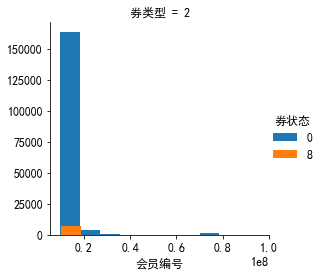

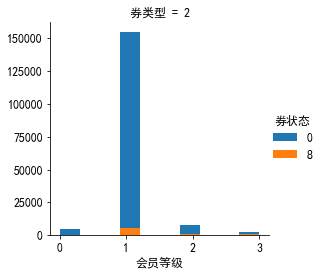

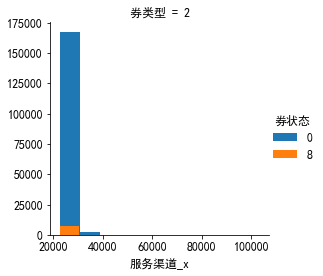

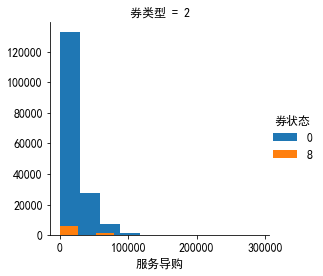

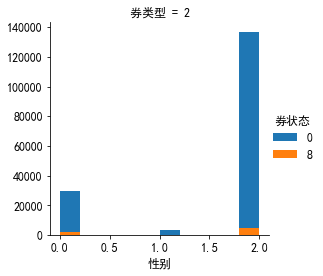

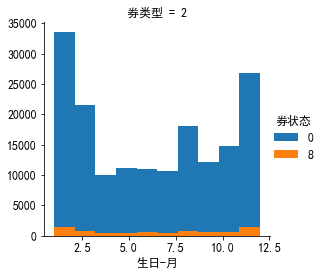

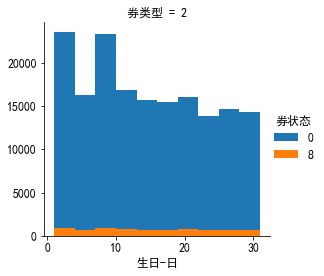

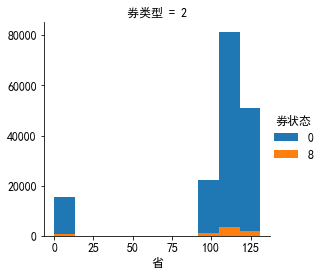

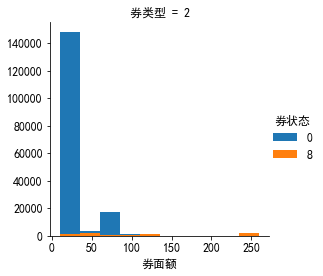

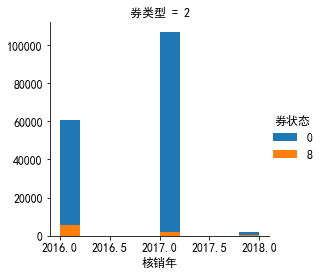

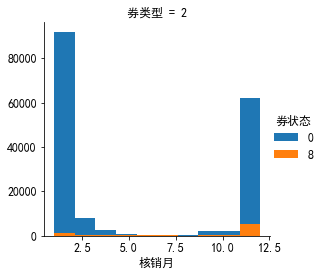

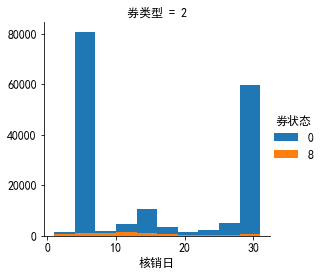

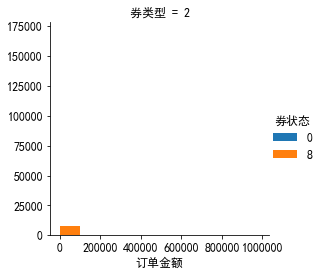

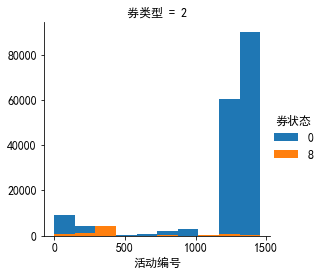

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns
coupon_2_X=coupon_2[['会员编号','会员等级','服务渠道_x','服务导购','性别','生日-月','生日-日','省','券面额','核销年','核销月','核销日','订单金额','活动编号']]
plt.rc("font",family="SimHei",size="12") 
for i in coupon_2_X.columns:
    h = sns.FacetGrid(coupon_2,col= '券类型',hue = '券状态', height=4)#row
    h.map(plt.hist,i)
    h.add_legend()

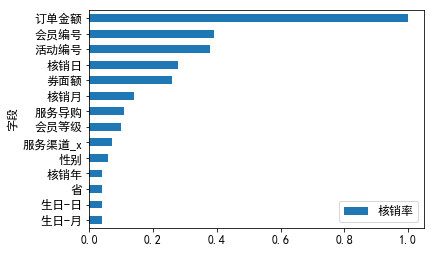

In [174]:
dif={}  
for i in coupon_2_X.columns:
    dif[i]=float(round((coupon_2[coupon_2['券状态']==8][i].value_counts()/coupon_2[i].value_counts()).mean(),2))
dif=pd.DataFrame(sorted(dif.items(),key=lambda item:item[1],reverse=False))
dif.columns=['字段','核销率']
dif.set_index('字段').plot(kind='barh')

# 对比数据可以得到如下结论：
# 1.大部分关联字段呈比例分布，即用户越多的话，相对应的券核销越多
# 2.券面额是用户核销重要因素，金额越大，核销可能性越高
# 3.2018年券发放少很多，是品牌做大了不需要发券？
# 4.券核销量最高峰在12月，经分析主要是2016年12月数据进入EZR后，发放的券量大而且券金额高
# 5.每月的5号及29号核销比例最低,为什么？
# 6.部分活动编号核销率很高，如活动编号300-420之间

## （1）券面额因素

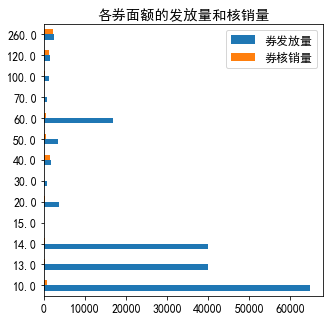

In [200]:
x=pd.concat([coupon_2['券面额'].value_counts(),coupon_2[coupon_2['券状态']==8]['券面额'].value_counts()], axis=1)
x.columns=['券发放量','券核销量']
x.plot(kind='barh',figsize=[5,5],title='各券面额的发放量和核销量')

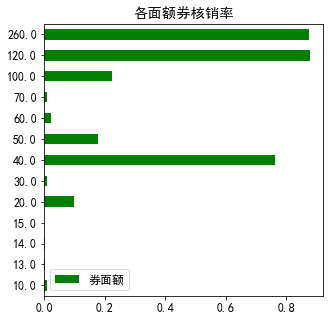

In [205]:
pd.DataFrame(coupon_2[coupon_2['券状态']==8]['券面额'].value_counts()/coupon_2['券面额'].value_counts()).plot(kind='barh',figsize=[5,5],title='各面额券核销率',color='g')

### 券面额为40 120 260的核销率很高，如果说券面额越高核销率越高，但是券面额为40核销率也高，why？

核销年： 2016
10.0     54986
20.0       100
40.0      1814
50.0      2678
60.0      1993
100.0      693
120.0     1367
260.0     2524
Name: 券面额, dtype: int64
核销年： 2017
10.0      7937
13.0     39990
14.0     39991
20.0      3377
30.0       795
50.0       722
60.0     14831
70.0       781
100.0      587
Name: 券面额, dtype: int64
核销年： 2018
10.0     1824
15.0        3
20.0      215
100.0      30
Name: 券面额, dtype: int64


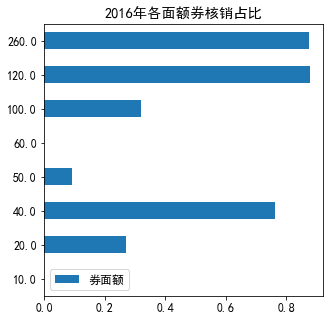

In [76]:
coupon_value=sorted(list(set(coupon_2['核销年'])))
for i in coupon_value:
    print('核销年：',i)
    print(coupon_2[coupon_2['核销年']==i]['券面额'].value_counts().sort_index())
coupon_2_M=coupon_2[coupon_2['核销年']==2016]
pd.DataFrame(coupon_2_M[coupon_2_M['券状态']==8]['券面额'].value_counts()/coupon_2_M['券面额'].value_counts()).plot(kind='barh',figsize=[5,5],title='2016年各面额券核销占比')

### 对比每年发放的券面额量分布，其中券面额为40元都是在2016年发放的，接下来看看40元和50元核销差别大的原因 

Index(['会员编号', '会员等级', '服务渠道_x', '服务导购', '性别', '生日-月', '生日-日', '省', '券类型',
       '券面额', '核销年', '核销月', '核销日', '订单金额', '活动编号', '券状态'],
      dtype='object')


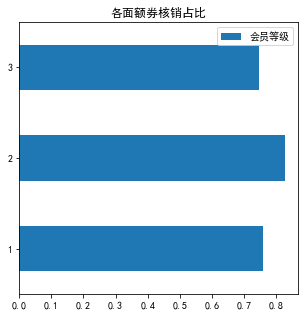

In [14]:
coupon_2_M=coupon_2[coupon_2['核销年']==2016]
coupon_2_M=coupon_2_M[coupon_2_M['券面额']==40.0]
print(coupon_2_M.columns)
pd.DataFrame(coupon_2_M[coupon_2_M['券状态']==8]['会员等级'].value_counts()/coupon_2_M['会员等级'].value_counts()).plot(kind='barh',figsize=[5,5],title='各面额券核销占比')

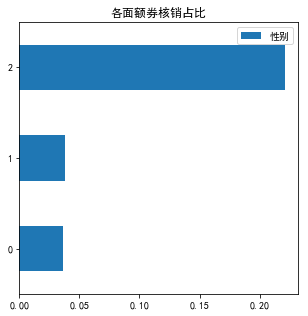

In [18]:
coupon_2_M=coupon_2[coupon_2['核销年']==2016]
coupon_2_M=coupon_2_M[coupon_2_M['券面额']==50.0]
pd.DataFrame(coupon_2_M[coupon_2_M['券状态']==8]['性别'].value_counts()/coupon_2_M['性别'].value_counts()).plot(kind='barh',figsize=[5,5],title='各面额券核销占比')

###   对比2016年券面额40、50元这两种券的数据，他们在多方面，如性别 会员等级等有着差别，此时猜想核销率或许与人物特征有关 

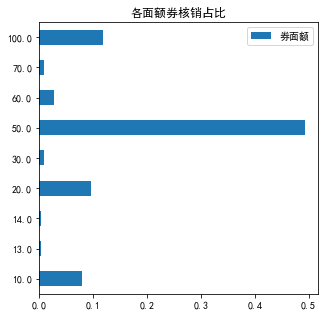

In [20]:
coupon_2_M=coupon_2[coupon_2['核销年']==2017]
pd.DataFrame(coupon_2_M[coupon_2_M['券状态']==8]['券面额'].value_counts()/coupon_2_M['券面额'].value_counts()).plot(kind='barh',figsize=[5,5],title='各面额券核销占比')

##  2017年券的数据
### 券面额达到100以上时，核销率比较高
###   同样为什么券面额为50元的核销比例高，其他面额的券核销率低？
###   经过数据对比，券面额30、40、50元的核销率高低和会员编号 服务导购  性别等有一定的关联

In [130]:
coupon_2_M=coupon_2[coupon_2['核销年']==2017]
coupon_2_M5=coupon_2_M[coupon_2_M['券面额']==50.0]
coupon_2_M6=coupon_2_M[coupon_2_M['券面额']==60.0]
#print(coupon_2_M5.columns)
dif={}
for i in coupon_2_M5.columns:
#    print(i)
#    print(pd.DataFrame(coupon_2_M5[coupon_2_M5['券状态']==8][i].value_counts()/coupon_2_M5[i].value_counts()).mean())
#    print(pd.DataFrame(coupon_2_M6[coupon_2_M6['券状态']==8][i].value_counts()/coupon_2_M6[i].value_counts()).mean())
    dif[i]=float(round(pd.DataFrame(coupon_2_M5[coupon_2_M5['券状态']==8][i].value_counts()/coupon_2_M5[i].value_counts()).mean()/pd.DataFrame(coupon_2_M6[coupon_2_M6['券状态']==8][i].value_counts()/coupon_2_M6[i].value_counts()).mean(),2))
#    print('两者差异比：',pd.DataFrame(coupon_2_M5[coupon_2_M5['券状态']==8][i].value_counts()/coupon_2_M5[i].value_counts()).mean()/pd.DataFrame(coupon_2_M6[coupon_2_M6['券状态']==8][i].value_counts()/coupon_2_M6[i].value_counts()).mean())    
#    print('==================================')
sorted(dif.items(),key=lambda item:item[1],reverse=True)

[('性别', 23.97),
 ('核销月', 19.94),
 ('省', 19.24),
 ('券类型', 17.62),
 ('券面额', 17.62),
 ('核销年', 17.62),
 ('生日-日', 17.04),
 ('服务渠道_x', 9.16),
 ('服务导购', 5.43),
 ('生日-月', 5.42),
 ('会员等级', 5.4),
 ('活动编号', 2.64),
 ('会员编号', 1.2),
 ('订单金额', 1.01),
 ('券状态', 1.0),
 ('核销日', 0.59)]

In [113]:
coupon_2_M5[coupon_2_M5['券状态']==8]['券面额'].value_counts()/coupon_2_M5['券面额'].value_counts()

d:\安装程序\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


50.0    0.493075
Name: 券面额, dtype: float64

### 2017年券面额50元和60元   把不同字段的核销率的均值相除，核销率比例过于悬殊

###   比较券面额50、60元    两个核销相差那么大，差别主要体现在(从大到小排序)性别 核销月 省 生日-日 服务渠道_x 服务导购 生日-月 会员等级 活动编号 会员编号 订单金额

## （2）年因素分析

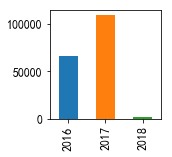

In [312]:
coupon_2['核销年'].value_counts().sort_index().plot(kind='bar',figsize=(2,2))

### 2018年券发放量变得很小，差别巨大

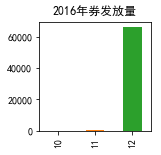

In [31]:
coupon_2[coupon_2['核销年']==2016]['核销月'].value_counts().sort_index().plot(kind='bar',figsize=(2,2),title='2016年券发放量')

###   2016年发放券基本是12月

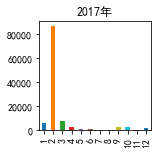

In [30]:
coupon_2[coupon_2['核销年']==2017]['核销月'].value_counts().sort_index().plot(kind='bar',figsize=(2,2),title='2017年券发放量')

### 2017年券都是在2月发放，其他月发放很少

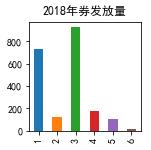

In [32]:
coupon_2[coupon_2['核销年']==2018]['核销月'].value_counts().sort_index().plot(kind='bar',figsize=(2,2),title='2018年券发放量')

### 2018年基本不发什么券

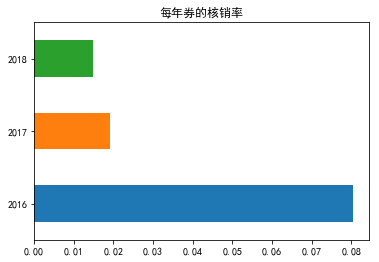

In [33]:
(coupon_2[coupon_2['券状态']==8]['核销年'].value_counts()/coupon_2['核销年'].value_counts().sort_index()).plot(kind='barh',title='每年券的核销率')

### 2016年12月和2017年2月发放的券最多，猜测因为该品牌刚开始发券增长人气；到了2018年券的发放开始变少，因为不需要？
### 同时核销率也在下降，这是不发券的原因(同时发的券金额越来越低)

##      （3）核销月和日因素分析

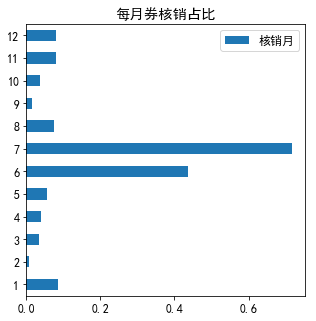

In [344]:
pd.DataFrame(coupon_2[coupon_2['券状态']==8]['核销月'].value_counts()/coupon_2['核销月'].value_counts()).plot(kind='barh',figsize=[5,5],title='每月券核销占比')

### 6月 7月(2017年)核销率较高，其他月份低了很多 

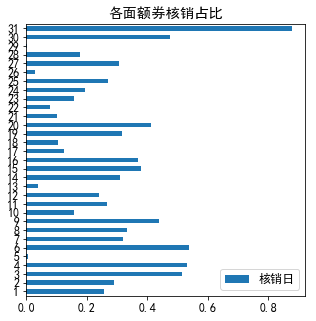

In [165]:
pd.DataFrame(coupon_2[coupon_2['券状态']==8]['核销日'].value_counts()/coupon_2['核销日'].value_counts()).plot(kind='barh',figsize=[5,5],title='每日券核销占比')

In [215]:
coupon_2_R29=coupon_2[coupon_2['核销日']==29]
coupon_2_R31=coupon_2[coupon_2['核销日']==31]

dif={}
for i in coupon_2_R29.columns:
#    print(i)
#    print(pd.DataFrame(coupon_2_R29[coupon_2_R29['券状态']==8][i].value_counts()/coupon_2_R29[i].value_counts()).mean())
#    print(pd.DataFrame(coupon_2_R31[coupon_2_R31['券状态']==8][i].value_counts()/coupon_2_R31[i].value_counts()).mean())
    dif[i]=float(round(pd.DataFrame(coupon_2_R31[coupon_2_R31['券状态']==8][i].value_counts()/coupon_2_R31[i].value_counts()).mean()/pd.DataFrame(coupon_2_R29[coupon_2_R29['券状态']==8][i].value_counts()/coupon_2_R29[i].value_counts()).mean(),2))
#    print('两者差异比：',pd.DataFrame(coupon_2_M5[coupon_2_M5['券状态']==8][i].value_counts()/coupon_2_M5[i].value_counts()).mean()/pd.DataFrame(coupon_2_M6[coupon_2_M6['券状态']==8][i].value_counts()/coupon_2_M6[i].value_counts()).mean())    
#    print('==================================')
sorted(dif.items(),key=lambda item:item[1],reverse=True)

[('券类型', 494.41),
 ('核销日', 494.41),
 ('生日-月', 483.26),
 ('生日-日', 429.9),
 ('会员等级', 92.85),
 ('省', 82.01),
 ('性别', 53.28),
 ('服务渠道_x', 36.63),
 ('核销年', 13.55),
 ('服务导购', 10.83),
 ('核销月', 2.37),
 ('券面额', 1.89),
 ('会员编号', 1.85),
 ('活动编号', 1.38),
 ('订单金额', 1.02),
 ('券状态', 1.0)]

###   比较券核销日29、31日    两个核销相差那么大，差别主要体现在(从大到小排序)生日-月,生日-日,会员等级,省,性别,服务渠道_x,核销年,服务导购,核销月,券面额,会员编号,活动编号,订单金额

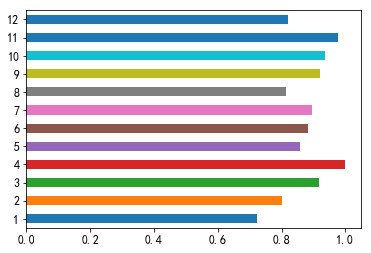

In [225]:
(coupon_2_R31[coupon_2_R31['券状态']==8]['生日-月'].value_counts()/coupon_2_R31['生日-月'].value_counts()).plot(kind='barh')

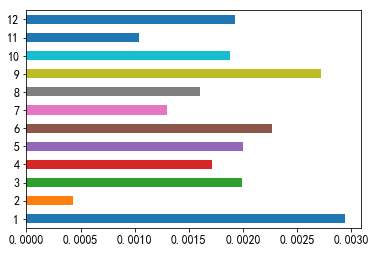

In [227]:
(coupon_2_R29[coupon_2_R29['券状态']==8]['生日-月'].value_counts()/coupon_2_R29['生日-月'].value_counts()).plot(kind='barh')

#      （4）活动因素分析

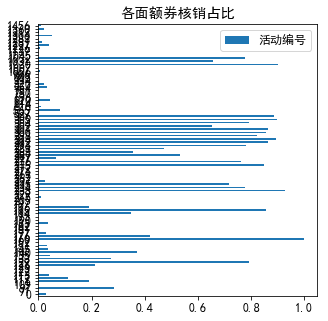

In [260]:
pd.DataFrame(coupon_2[coupon_2['券状态']==8]['活动编号'].value_counts()/coupon_2['活动编号'].value_counts()).plot(kind='barh',figsize=[5,5],title='各面额券核销占比')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D62308E80>]],
      dtype=object)

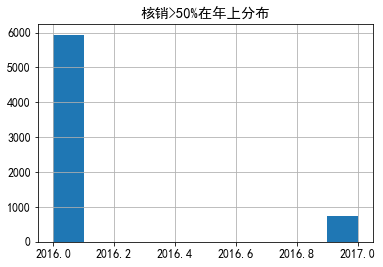

In [300]:
coupon_2_A=pd.DataFrame(coupon_2[coupon_2['券状态']==8]['活动编号'].value_counts()/coupon_2['活动编号'].value_counts())
year=[]
for i in list(coupon_2_A[coupon_2_A['活动编号']>0.5].index):
    year.extend(list(coupon_2[coupon_2['活动编号']==i]['核销年']))
pd.DataFrame(year,columns =['核销>50%在年上分布']).hist()

### 这些核销率在50%以上的活动基本都是和核销在2016年 
###  看看2017年某些活动编号核销率大的因素

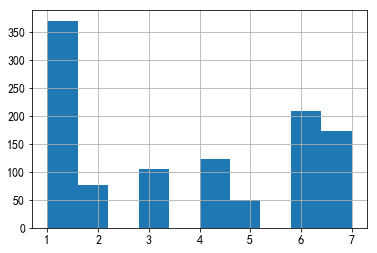

In [358]:
coupon_2_Y2017=coupon_2[coupon_2['核销年']==2017]
coupon_2_Y2017=pd.DataFrame(coupon_2_Y2017[coupon_2_Y2017['券状态']==8]['活动编号'].value_counts()/coupon_2_Y2017['活动编号'].value_counts())
coupon_2_Y2017=coupon_2_Y2017[coupon_2_Y2017['活动编号']>0.5].dropna(axis=0)
coupon_2_Y2017=coupon_2_Y2017.reset_index()
coupon_2_Y2017.columns=['活动编号','核销率']
coupon_2_Y2017=pd.merge(coupon_2_Y2017, coupon_2, how='inner', on=['活动编号'])
coupon_2_Y2017=coupon_2_Y2017[coupon_2_Y2017['核销年']==2017]
coupon_2_Y2017['核销月'].hist()

### 2017年核销率50%以上的活动    核销总量一半都是发生在一月和二月，二月后发的券面额都开始变小 
###   到七月后核销率逐渐降低，一直在低区间波动

##  综上数据所展示的，排除年发券量、特殊月份等因素，选择2017年6月、7月以及2016年券面额为40元数据来对比相似的数据看看用户画像的特征
## 其中问题: 
## 数据量只有一部分，描述不了整体的用户特征
## 另外用户的维度还是太少，目前仅有会员等级, 性别, 生日-月, 生日-日, 省；需要开发一些新的特征，如用户消费水平，优惠敏感度，收入，教育程度等等

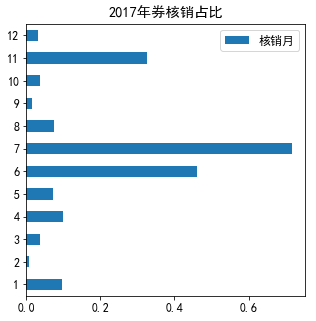

In [78]:
coupon_2_Y2017=coupon_2[coupon_2['核销年']==2017]
coupon_2_Y2017=pd.DataFrame(coupon_2_Y2017[coupon_2_Y2017['券状态']==8]['活动编号'].value_counts()/coupon_2_Y2017['活动编号'].value_counts())
coupon_2_Y2017=coupon_2_Y2017.dropna(axis=0)
coupon_2_Y2017=coupon_2_Y2017.reset_index()
coupon_2_Y2017.columns=['活动编号','核销率']
coupon_2_Y2017=pd.merge(coupon_2_Y2017, coupon_2, how='inner', on=['活动编号'])
coupon_2_Y2017=coupon_2_Y2017[coupon_2_Y2017['核销年']==2017]
pd.DataFrame(coupon_2_Y2017[coupon_2_Y2017['券状态']==8]['核销月'].value_counts()/coupon_2_Y2017['核销月'].value_counts()).plot(kind='barh',figsize=[5,5],title='2017年券核销占比')

### 为什么2017年6月 7月核销率这么高，同条件下对比下2017年7月和8月数据人物特征差别

Index(['会员编号', '会员等级', '服务渠道_x', '服务导购', '性别', '生日-月', '生日-日', '省', '券类型',
       '券面额', '核销年', '核销月', '核销日', '订单金额', '活动编号', '券状态'],
      dtype='object')


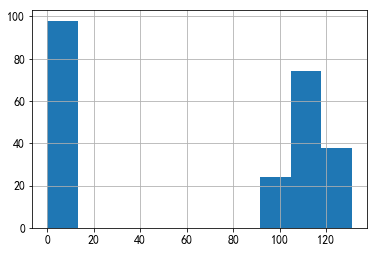

In [212]:
coupon_2_Y2017=coupon_2[coupon_2['核销年']==2017]
coupon_2_M7=coupon_2_Y2017[coupon_2_Y2017['核销月']==7]
coupon_2_M8=coupon_2_Y2017[coupon_2_Y2017['核销月']==8]
print(coupon_2_M7.columns) 
'''for i in coupon_2_M7.columns:
    print(pd.DataFrame(coupon_2_M7[coupon_2_M7['券状态']==8][i].value_counts()/coupon_2_M7[i].value_counts()))'''

coupon_2_M7['省'].hist()

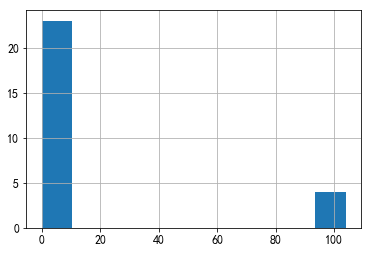

In [213]:
coupon_2_M8['省'].hist()

### 2017年7月和8月用户特征差别在：
####      1.7月券发放为女性相对较多，包含少量男性；八月女性较少
####      2.8月券发放会员为多为1级，而二级和三级会员等级用户很少(也有可能存在因果关系)
####      3.对于生日-月和生日-日字段，8月发放的券没有7月份发放的券分布均衡
####      4.7月相比8月发放部分省的券多,而8月份发的用户都是山西

### 2016年券40元的核销率这么高，在此比较下和券面额为50元的人物特征差别

Index(['会员编号', '会员等级', '服务渠道_x', '服务导购', '性别', '生日-月', '生日-日', '省', '券类型',
       '券面额', '核销年', '核销月', '核销日', '订单金额', '活动编号', '券状态'],
      dtype='object')


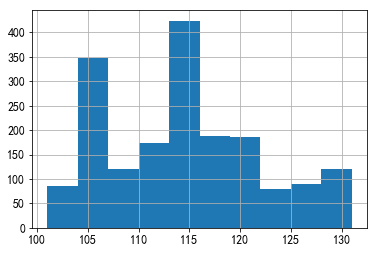

In [221]:
coupon_2_Y2017=coupon_2[coupon_2['核销年']==2016]
coupon_2_Q4=coupon_2_Y2017[coupon_2_Y2017['券面额']==40.0]
coupon_2_Q5=coupon_2_Y2017[coupon_2_Y2017['券面额']==50.0]
print(coupon_2_Q4.columns)
coupon_2_Q4['省'].hist()

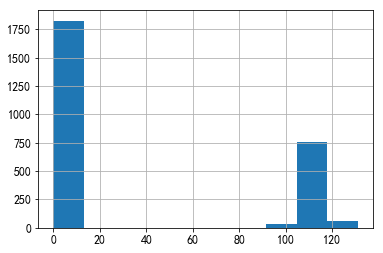

In [222]:
coupon_2_Q5['省'].hist()

In [227]:
coupon_2_Q4['省'].value_counts()

115    401
104    188
116    158
110    123
119    110
105     87
127     83
106     73
103     69
131     65
123     63
107     61
120     54
108     53
128     40
112     39
118     28
121     22
114     20
122     17
129     16
111     12
101     12
109      6
125      6
102      4
113      3
117      1
Name: 省, dtype: int64

In [226]:
dict_pro

{101: '北京市',
 102: '天津市',
 103: '河北省',
 104: '山西省',
 105: '内蒙古自治区',
 106: '辽宁省',
 107: '吉林省',
 108: '黑龙江省',
 109: '上海市',
 110: '江苏省',
 111: '浙江省',
 112: '安徽省',
 113: '福建省',
 114: '江西省',
 115: '山东省',
 116: '河南省',
 117: '湖北省',
 118: '湖南省',
 119: '广东省',
 120: '广西壮族自治区',
 121: '海南省',
 122: '重庆市',
 123: '四川省',
 124: '贵州省',
 125: '云南省',
 126: '西藏自治区',
 127: '陕西省',
 128: '甘肃省',
 129: '青海省',
 130: '宁夏回族自治区',
 131: '新疆维吾尔自治区',
 132: '澳门',
 133: '香港',
 134: '台湾省',
 135: '测试',
 136: '0920测试001'}

### 2016年40元和50元券差别在：
####      1.40元券发放会员等级在1级以上，50元券发放的主要是会员等级为0级和1级
####      2.40元券大部分发放给女性，而50元的券大部分却是发放给男性
####      3.50元的券主要还是发放给一月过生日的人
####      4.50元的券都是发放过生日-日为月初的人，40元的券发放均匀分布
####      5.40元的券发放的省主要是山东，而50元的券发放的省大部分是内蒙和辽宁

### 另外券面额不是关键因素(核销的券面额都是10 20，且面额10的核销率远大于面额20的券...)

##  总结：
###   2016年发放的券最多，核销率也是最高(2016.12和2017.02发放券最多，券面额越高，核销率越高)
###   女性相对男性，核销可能性更高(化妆品偏向与女性)
###   会员等级因素影响券的核销(关联程度一般)
###   会员过生日等，券按需均匀发放比较合适
###    券发放的省的编号在100以上更为合适
###    当然券面额越大，越有可能核销

# 2.礼品券

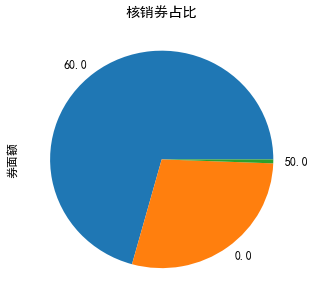

In [102]:
from pylab import mpl
mpl.rcParams["font.sans-serif"] = ["SimHei"]
coupon_3['券面额'].value_counts().plot(kind="pie",figsize=[5,5],title="礼品券占比")

# 3.邀请券

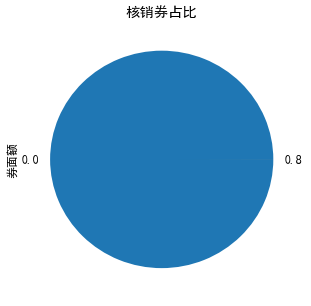

In [103]:
from pylab import mpl
mpl.rcParams["font.sans-serif"] = ["SimHei"]
coupon_4['券面额'].value_counts().plot(kind="pie",figsize=[5,5],title="邀请券占比")

# 由于我们品牌较多   该品牌只是其中一种场景   数据分析就到此  暂不进入数据更深层的探索 

# 代金券的用户画像探索

### 人物属性: '性别', '生日-月', '生日-日'，'省'
### 用户行为: '核销年','核销月', '核销日'
### 用户分级：'会员等级', '订单金额'
### 特征人群：'券面额', '服务导购'

In [428]:
coupon_2_person=coupon_2[['会员编号', '会员等级', '服务导购', '性别', '生日-月', '生日-日', '省','券面额', '核销年', '核销月', '核销日', '订单金额', '活动编号', '券状态']]
coupon_2_inplace=coupon_2_person[coupon_2_person['服务导购']!=0]
coupon_2_inplace['服务导购']=1
coupon_2_person=pd.concat([coupon_2_inplace,coupon_2_person[coupon_2_person['服务导购']==0]]).sort_index()
coupon_2_person=coupon_2_person.replace(8,1)
from sklearn.cross_validation import train_test_split
X=coupon_2_person[['会员等级', '服务导购', '性别', '生日-月', '生日-日', '省','券面额', '核销年', '核销月', '核销日', '活动编号']]
y=coupon_2_person['券状态']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 33)

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
clf = tree.DecisionTreeClassifier()#class_weight='balanced')
clf.fit(X_train,y_train)

rf = RandomForestClassifier(n_estimators=20, max_depth=4)
rf.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,X_train,y_train,cv=5)
print("决策树在训练集上的精确率:{0:.2f}% +/-{1:.2f}%".format(scores.mean()*100,scores.std()*300))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf,X_train,y_train,cv=5)
print("随机森林在训练集上的精确率:{0:.2f}% +/-{1:.2f}%".format(scores.mean()*100,scores.std()*300))

scores = cross_val_score(clf,X_test,y_test,cv=5)
print("决策树在测试集上的精确率:{0:.2f}% +/-{1:.2f}%".format(scores.mean()*100,scores.std()*300))

scores = cross_val_score(rf,X_test,y_test,cv=5)
print("随机森林在测试集上的精确率:{0:.2f}% +/-{1:.2f}%".format(scores.mean()*100,scores.std()*300))

from sklearn.model_selection import cross_val_predict
train_predict = cross_val_predict(clf,X_train,y_train,cv=5)
train_predict_1 = cross_val_predict(rf,X_train,y_train,cv=5)

from sklearn.metrics import confusion_matrix
confusion_matrix(train_predict,y_train)


d:\安装程序\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


决策树在训练集上的精确率:98.91% +/-0.20%
随机森林在训练集上的精确率:97.59% +/-0.23%
决策树在测试集上的精确率:98.72% +/-0.28%
随机森林在测试集上的精确率:97.66% +/-0.33%


array([[126708,    785],
       [   638,   4797]], dtype=int64)

In [429]:
from sklearn.metrics import precision_score,recall_score,f1_score
p_s = precision_score(train_predict,y_train)
r_s = recall_score(train_predict,y_train)
f1 = f1_score(train_predict,y_train)
print('训练集   查准率为:{0:.2f}%,查全率为{1:.2f}%,F1_Score为:{2:.2f}%'.format(p_s*100,r_s*100,f1*100))

test_predict = cross_val_predict(clf,X_test,y_test,cv=5)
p_s = precision_score(test_predict,y_test)
r_s = recall_score(test_predict,y_test)
f1 = f1_score(test_predict,y_test)
print('测试集   查准率为:{0:.2f}%,查全率为{1:.2f}%,F1_Score为:{2:.2f}%'.format(p_s*100,r_s*100,f1*100))

训练集   查准率为:85.94%,查全率为88.26%,F1_Score为:87.08%
测试集   查准率为:83.68%,查全率为86.24%,F1_Score为:84.94%


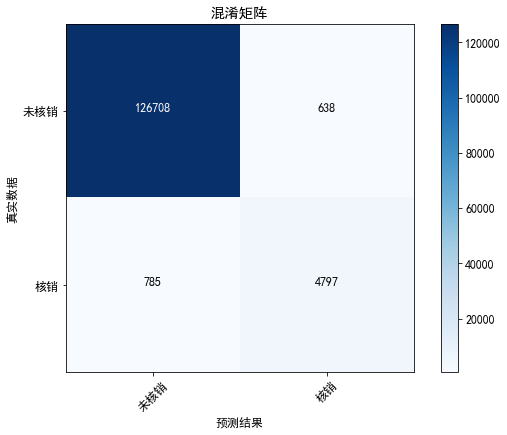

In [430]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
def plot_confusion_matrix(cm,classes,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title('混淆矩阵')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    fmt = 'd';thresh = cm.max()/2.0
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(i,j,format(cm[i,j],fmt),horizontalalignment='center',color='white' if cm[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('真实数据')
    plt.xlabel('预测结果')
    
#compute confusion matrix
cnf_matrix = confusion_matrix(train_predict,y_train)
np.set_printoptions(precision=2)
class_names = ['未核销','核销']
plt.figure(figsize = (8,6))
plot_confusion_matrix(cnf_matrix,classes=class_names)

**原始字段穷举所有子集  速度太慢了**

In [431]:
from sklearn import tree
from sklearn.metrics import precision_score,recall_score,f1_score

from itertools import combinations
score=0
clf = tree.DecisionTreeClassifier()
for i in range(1,len(X_train.columns)+1):
    print(i)
    num=list(combinations(X_train.columns, i))
    for j in num:        
        clf.fit(X_train[list(j)],y_train)
        select_predict=cross_val_predict(clf,X_train[list(j)],y_train,cv=5)
        
        f1 = f1_score(select_predict,y_train)
        if f1>score:
            score=f1
            print(j)
            print(f1)

1


d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall

('券面额',)
0.7284701114488349


d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


('活动编号',)
0.7779661016949153
2


d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall

('省', '活动编号')
0.7780040733197555
('券面额', '核销日')
0.8186003683241252
('核销月', '活动编号')
0.8395039539899353
('核销日', '活动编号')
0.8823062681830203
3


d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
d:\安装程序\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall

('省', '核销日', '活动编号')
0.8829922115558777
('券面额', '核销日', '活动编号')
0.8870373618663391
('核销年', '核销日', '活动编号')
0.8887525203822214
('核销月', '核销日', '活动编号')
0.8941896024464833
4
('性别', '核销月', '核销日', '活动编号')
0.8943117672600954
('券面额', '核销月', '核销日', '活动编号')
0.8953610045343565
5
('性别', '券面额', '核销月', '核销日', '活动编号')
0.8964799722559389
6
('性别', '券面额', '核销年', '核销月', '核销日', '活动编号')
0.8965935685186791
7
8
9
10
11


In [548]:
from sklearn import tree
from sklearn.metrics import precision_score,recall_score,f1_score

from itertools import combinations
score=0
clf = tree.DecisionTreeClassifier()
for i in range(1,len(select_train.columns)+1):
    print(i)
    num=list(combinations(select_train.columns, i))
    for j in num:        
        clf.fit(select_train[list(j)],y_train)
        select_predict=cross_val_predict(clf,select_train[list(j)],y_train,cv=5)
        f1 = precision_score(select_predict,y_train)
#        f1 = f1_score(select_predict,y_train)
        if f1>score:
            score=f1
            print(j)
            print(f1)

1
2
3
('会员等级', '性别', '生日-日')
0.0007165890361877463
('会员等级', '性别', '省')
0.0051952705123611605
('会员等级', '生日-月', '生日-日')
0.018631314940881404
('会员等级', '生日-月', '省')
0.028484414188462915
('会员等级', '生日-日', '省')
0.038337513436044426
4
('会员等级', '性别', '生日-月', '生日-日')
0.04138301683984235
('会员等级', '性别', '生日-日', '省')
0.04801146542457901
('会员等级', '生日-月', '生日-日', '省')
0.073450376209244
5
('会员等级', '性别', '生日-月', '生日-日', '省')
0.0915442493729846


**整体评价**

In [547]:
from sklearn.metrics import precision_score,recall_score,f1_score
select_train=X_train[['会员等级', '性别', '生日-月', '生日-日', '省']]
#X_train[['会员等级', '服务导购', '性别', '生日-月', '生日-日', '省','券面额', '核销年', '核销月', '核销日', '活动编号']]
clf.fit(select_train,y_train)
select_predict = cross_val_predict(clf,select_train,y_train,cv=5)
p_s = precision_score(select_predict,y_train)
r_s = recall_score(select_predict,y_train)
f1 = f1_score(select_predict,y_train)
print('查准率为:{0:.2f}%,查全率为{1:.2f}%,F1_Score为:{2:.2f}%'.format(p_s*100,r_s*100,f1*100))
from sklearn.metrics import confusion_matrix
confusion_matrix(select_predict,y_train)

查准率为:9.15%,查全率为39.43%,F1_Score为:14.86%


array([[126561,   5071],
       [   785,    511]], dtype=int64)

##  玛丽黛佳目前暂时只考虑用会员等级, 性别, 生日-月, 生日-日, 省这五个用户维度的话，预测的准备只有10%

###  模型需要活动编号或券面额因素   才会有高的预测率，否则预测率会很低

In [550]:
from sklearn import tree
clf.fit(select_train,y_train)
tree.export_graphviz(clf, out_file='tree.dot',max_depth=3,feature_names=['level','sex','month','day','province'],class_names=['0','1'])

**cd C:\Users\86135\Desktop\iPython\驿氪\协同过滤**
**dot -T png tree.dot -o tree.png**

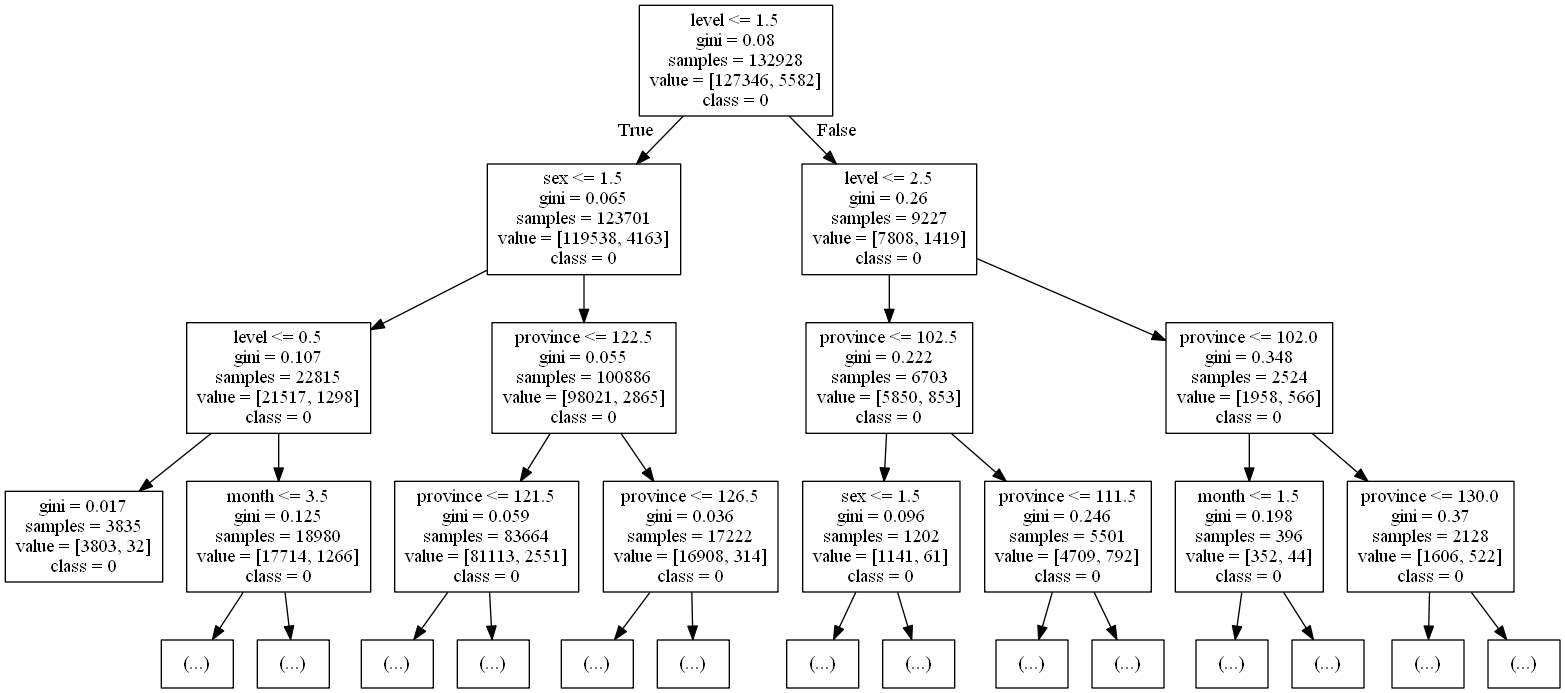

In [551]:
%matplotlib inline
from IPython.display import Image
Image('tree.png')

In [552]:
XX=coupon_2[coupon_2['会员等级']<=1.5]
XX

,会员编号,会员等级,服务渠道_x,服务导购,性别,生日-月,生日-日,省,券面额,核销年,核销月,核销日,订单金额,活动编号,券状态
55,13655559,0,22824,0,0,1,1,0,50.0,2016,12,26,0.0,135,0
56,13655559,0,22824,0,0,1,1,0,50.0,2016,12,26,0.0,135,0
57,13655559,0,22824,0,0,1,1,0,10.0,2016,12,26,0.0,135,0
58,13650554,0,22824,0,0,1,1,0,50.0,2016,12,26,0.0,135,0
59,13650554,0,22824,0,0,1,1,0,50.0,2016,12,26,0.0,135,0
60,13650554,0,22824,0,0,1,1,0,10.0,2016,12,26,0.0,135,0
61,13648709,0,22824,0,0,1,1,0,50.0,2016,12,26,0.0,135,0
62,13648709,0,22824,0,0,1,1,0,50.0,2016,12,26,0.0,135,0
63,13648709,0,22824,0,0,1,1,0,10.0,2016,12,26,0.0,135,0
64,13633374,0,22824,0,0,1,1,0,50.0,2016,12,26,0.0,135,0


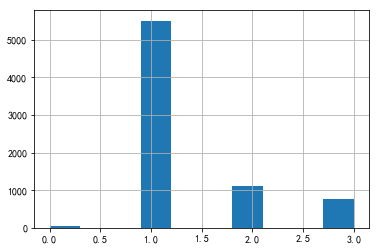

In [572]:
XX=coupon_2[coupon_2['券状态']==8]
XX[['会员等级', '性别', '生日-月', '生日-日', '省']]
XX['性别'].hist()

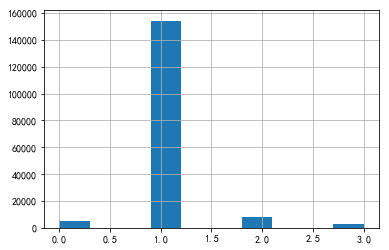

In [571]:
YY=coupon_2[coupon_2['券状态']==0]
YY[['会员等级', '性别', '生日-月', '生日-日', '省']]
YY['会员等级'].hist()

# 影儿数据

In [2]:
import pandas as pd
path3=open(r'C:\Users\86135\Desktop\data.csv',encoding='gbk',errors='ignore')
data3=pd.read_csv(path3)
data3.columns=['index','会员编号', '会员等级', '服务渠道_x', '服务导购', '性别', '生日-月', '生日-日', '省', '券类型',
       '券面额', '核销年', '核销月', '核销日', '订单金额', '活动编号', '券状态']
del data3['index']

In [38]:
data3

,index,会员编号,会员等级,服务渠道_x,服务导购,性别,生日-月,生日-日,省,券类型,券面额,核销年,核销月,核销日,订单金额,活动编号,券状态
0,0,3480745,0.0,37723,125239,0,1,1,0,1.0,50,2018,10,20,0.0,2,0
1,1,3480745,0.0,37723,125239,0,1,1,0,3.0,0,2018,12,27,0.0,21,0
2,2,3480745,0.0,37723,125239,0,1,1,0,3.0,0,2018,12,24,0.0,21,0
3,3,3483177,0.0,37519,124301,0,1,1,0,3.0,0,2018,12,31,0.0,22,0
4,4,3399888,0.0,38296,131980,0,1,1,0,3.0,0,2019,1,10,0.0,66,0
5,5,3484141,0.0,37486,20004028,0,1,1,0,1.0,50,2018,10,20,0.0,6,0
6,6,3484962,0.0,38599,145199,0,1,1,0,3.0,0,2018,12,22,0.0,22,0
7,7,3586311,0.0,38569,127533,0,1,1,0,3.0,0,2018,12,23,0.0,22,0
8,8,3586311,0.0,38569,127533,0,1,1,0,3.0,0,2018,12,23,0.0,22,0
9,9,3586311,0.0,38569,127533,0,1,1,0,3.0,0,2018,12,23,0.0,22,0


In [64]:
yinger=data3[['会员等级', '服务导购', '性别', '生日-月', '生日-日', '省','券面额', '核销年', '核销月', '核销日', '活动编号','券状态']]
yinger['会员等级'].fillna(0.0, inplace=True)
yinger['会员等级']=yinger['会员等级'].astype(int)
yinger['券状态']=yinger['券状态'].replace(8,1)
yinger['券状态']=yinger['券状态'].replace(4,0)

d:\安装程序\python36\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
d:\安装程序\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
d:\安装程序\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pand

In [61]:
yinger

,会员等级,性别,生日-月,生日-日,省,券状态
0,0,0,1,1,0,0
1,0,0,1,1,0,0
2,0,0,1,1,0,0
3,0,0,1,1,0,0
4,0,0,1,1,0,0
5,0,0,1,1,0,0
6,0,0,1,1,0,0
7,0,0,1,1,0,0
8,0,0,1,1,0,0
9,0,0,1,1,0,0


In [215]:
from sklearn.metrics import precision_score,recall_score,f1_score
select_train=yinger[['会员等级', '服务导购', '性别', '生日-月', '生日-日', '省','券面额', '核销年', '核销月', '核销日', '活动编号']]
y_train=yinger[['券状态']]
#X_train[['会员等级', '服务导购', '性别', '生日-月', '生日-日', '省','券面额', '核销年', '核销月', '核销日', '活动编号']]
from sklearn import tree
from sklearn.model_selection import cross_val_predict
clf = tree.DecisionTreeClassifier()
clf.fit(select_train,y_train)
select_predict = cross_val_predict(clf,select_train,y_train,cv=5)
p_s = precision_score(select_predict,y_train)
r_s = recall_score(select_predict,y_train)
f1 = f1_score(select_predict,y_train)
print('查准率为:{0:.2f}%,查全率为{1:.2f}%,F1_Score为:{2:.2f}%'.format(p_s*100,r_s*100,f1*100))
from sklearn.metrics import confusion_matrix
confusion_matrix(select_predict,y_train)

查准率为:27.21%,查全率为16.47%,F1_Score为:20.52%


array([[2752647,  177664],
       [ 336704,   66406]], dtype=int64)

## 影儿数据中性别为男的券核销率几乎近0 

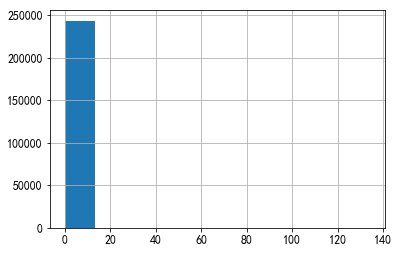

In [94]:
XX=yinger[yinger['券状态']==1]
XX[['性别', '生日-月', '生日-日', '省']]
XX['省'].hist()

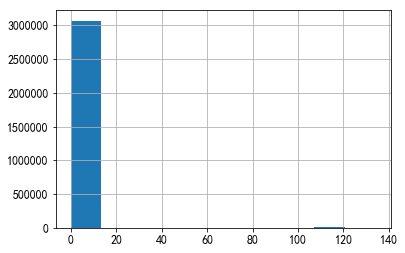

In [95]:
YY=yinger[yinger['券状态']==0]
YY[['性别', '生日-月', '生日-日', '省']]
YY['省'].hist()